In [20]:
import import_ipynb
import pandas as pd
#from google.colab import drive
from datetime import datetime
import math
import re
#drive.mount("/content/gdrive")
import torch
from transformers import RobertaForSequenceClassification, AutoTokenizer
import math
import statistics
model = RobertaForSequenceClassification.from_pretrained("wonrax/phobert-base-vietnamese-sentiment")
tokenizer = AutoTokenizer.from_pretrained("wonrax/phobert-base-vietnamese-sentiment", use_fast=False)
import plotly.graph_objects as go

In [19]:
# thư viện đọc, ghi file excel
!pip install openpyxl
# thư viện xử lý huấn luyện học máy
!pip install torch
!pip install plotly
!pip install import_ipynb
# thư viện phân tích số liệu và cac hàm thống kê
!pip install statistics
# thư viện hugging face cho xử lý NLP
!pip install transformers


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# import library
def get_raw_news(day_from, day_to):
    df = pd.read_excel('./preprocess data/data_textminingv2.xlsx')
    df=df.sort_values(by=['day_value'],ascending=True)
    #df = df.dropna(axis='day_value')
    df['day'] = df['day_value'].apply(lambda x: str(x).split(" ")[0])
    df['day'] = df.apply(lambda x: datetime.strptime(x.day, '%Y-%m-%d'), axis = 1)
    df = df[(df['day'] > day_from) & (df['day'] < day_to)]
    df['day'] = df['day'].dt.date
    return(df[['day','title','summary','source']])


In [4]:
df2=get_raw_news('2006-01-11','2022-12-10')
df2

,day,title,summary,source
1827,2006-05-09,ACB “ưu đãi vàng” cho chủ thẻ,"Từ nay đến ngày 31-12-2006, Ngân hàng TMCP Á C...",vietstock
1826,2006-06-09,Thông tin về việc cảnh cáo Thành viên,Giám đốc TTGDCK Tp.HCM quyết định cảnh cáo CTC...,vietstock
1829,2006-08-15,3 ngân hàng Việt Nam bị từ chối lập văn phòng ...,Lấy lý do Việt Nam chưa có luật chống rửa tiền...,vietstock
1828,2006-08-27,ACB phát hành 3.000 tỷ đồng trái phiếu chuyển đổi,Ngân hàng Thương mại cổ phần Á Châu (ACB) cho ...,vietstock
1823,2006-09-10,ACB mở phòng giao dịch tại Bến xe Miền Đông,Ngân hàng Thương mại Cổ phần Á Châu (ACB) vừa ...,vietstock
...,...,...,...,...
2104,2022-12-09,Thanh khoản sụt giảm VN-Index giữ được đà tăng...,NaN,cafef
2105,2022-12-09,"Khối ngoại vẫn tranh thủ ""gom"" gần 500 tỷ đồng...",NaN,cafef
2106,2022-12-09,VietinBank đại hạ giá khoản nợ hơn 1.400 tỷ th...,NaN,cafef
2108,2022-12-09,"Ngân hàng, chứng khoán, ngành nào đang trở thà...",NaN,cafef


In [5]:
df2=df2.sort_values(by=['day'],ascending=True)
df2

,day,title,summary,source
1827,2006-05-09,ACB “ưu đãi vàng” cho chủ thẻ,"Từ nay đến ngày 31-12-2006, Ngân hàng TMCP Á C...",vietstock
1826,2006-06-09,Thông tin về việc cảnh cáo Thành viên,Giám đốc TTGDCK Tp.HCM quyết định cảnh cáo CTC...,vietstock
1829,2006-08-15,3 ngân hàng Việt Nam bị từ chối lập văn phòng ...,Lấy lý do Việt Nam chưa có luật chống rửa tiền...,vietstock
1828,2006-08-27,ACB phát hành 3.000 tỷ đồng trái phiếu chuyển đổi,Ngân hàng Thương mại cổ phần Á Châu (ACB) cho ...,vietstock
1823,2006-09-10,ACB mở phòng giao dịch tại Bến xe Miền Đông,Ngân hàng Thương mại Cổ phần Á Châu (ACB) vừa ...,vietstock
...,...,...,...,...
2047,2022-12-09,Eximbank lần đầu được tăng vốn sau 10 năm,['Ngân hàng Nhà nước đồng ý cho Eximbank tăng ...,vnexpress
2046,2022-12-09,Năm 2023 sẽ kiểm toán một số ngân hàng lớn,"['Ngân hàng Nhà nước, VietinBank, BIDV', ' và ...",vnexpress
2108,2022-12-09,"Ngân hàng, chứng khoán, ngành nào đang trở thà...",NaN,cafef
2100,2022-12-09,Dòng vốn tín dụng sẽ được tăng thêm vào lĩnh v...,NaN,cafef


In [6]:
def news_cleaning_lower(x):
    # loại bỏ url từ html
    url_pattern = re.compile(r'http\S+')
    x = url_pattern.sub(r'', x)
    # loại bỏ emoji
    emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002500-\U00002BEF"  # chinese char
                            u"\U00002702-\U000027B0"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u"\U00010000-\U0010ffff"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                            u"\u200d"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\ufe0f"  # dingbats
                            u"\u3030"
                            "]+", flags=re.UNICODE)
    x = emoji_pattern.sub(r'', x)
    x = x.lower()
    return (x)

In [7]:

# Lọc những tin tức không ý nghĩa
def news_meaningless(df):
    # loại bỏ những tin chứa keywork giải thưởng
    test_list = ['giải thưởng']
    df['check'] = df['title'].apply(lambda x: any(ele in x for ele in test_list))
    df = df[df.check == False]
    df.drop(columns = 'check', inplace = True)
    # loại bỏ những thông tin không có summary
    #df = df[(df.summary.notnull())|(df.source=='cafef')]
    return df

In [8]:
df3=news_meaningless(df2)
df3

C:\Users\JamesDonKey\AppData\Local\Temp\ipykernel_7436\4097703503.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = 'check', inplace = True)


,day,title,summary,source
1827,2006-05-09,ACB “ưu đãi vàng” cho chủ thẻ,"Từ nay đến ngày 31-12-2006, Ngân hàng TMCP Á C...",vietstock
1826,2006-06-09,Thông tin về việc cảnh cáo Thành viên,Giám đốc TTGDCK Tp.HCM quyết định cảnh cáo CTC...,vietstock
1829,2006-08-15,3 ngân hàng Việt Nam bị từ chối lập văn phòng ...,Lấy lý do Việt Nam chưa có luật chống rửa tiền...,vietstock
1828,2006-08-27,ACB phát hành 3.000 tỷ đồng trái phiếu chuyển đổi,Ngân hàng Thương mại cổ phần Á Châu (ACB) cho ...,vietstock
1823,2006-09-10,ACB mở phòng giao dịch tại Bến xe Miền Đông,Ngân hàng Thương mại Cổ phần Á Châu (ACB) vừa ...,vietstock
...,...,...,...,...
2047,2022-12-09,Eximbank lần đầu được tăng vốn sau 10 năm,['Ngân hàng Nhà nước đồng ý cho Eximbank tăng ...,vnexpress
2046,2022-12-09,Năm 2023 sẽ kiểm toán một số ngân hàng lớn,"['Ngân hàng Nhà nước, VietinBank, BIDV', ' và ...",vnexpress
2108,2022-12-09,"Ngân hàng, chứng khoán, ngành nào đang trở thà...",NaN,cafef
2100,2022-12-09,Dòng vốn tín dụng sẽ được tăng thêm vào lĩnh v...,NaN,cafef


In [9]:
df3=df3.reset_index(drop=True)
df3

,day,title,summary,source
0,2006-05-09,ACB “ưu đãi vàng” cho chủ thẻ,"Từ nay đến ngày 31-12-2006, Ngân hàng TMCP Á C...",vietstock
1,2006-06-09,Thông tin về việc cảnh cáo Thành viên,Giám đốc TTGDCK Tp.HCM quyết định cảnh cáo CTC...,vietstock
2,2006-08-15,3 ngân hàng Việt Nam bị từ chối lập văn phòng ...,Lấy lý do Việt Nam chưa có luật chống rửa tiền...,vietstock
3,2006-08-27,ACB phát hành 3.000 tỷ đồng trái phiếu chuyển đổi,Ngân hàng Thương mại cổ phần Á Châu (ACB) cho ...,vietstock
4,2006-09-10,ACB mở phòng giao dịch tại Bến xe Miền Đông,Ngân hàng Thương mại Cổ phần Á Châu (ACB) vừa ...,vietstock
...,...,...,...,...
41781,2022-12-09,Eximbank lần đầu được tăng vốn sau 10 năm,['Ngân hàng Nhà nước đồng ý cho Eximbank tăng ...,vnexpress
41782,2022-12-09,Năm 2023 sẽ kiểm toán một số ngân hàng lớn,"['Ngân hàng Nhà nước, VietinBank, BIDV', ' và ...",vnexpress
41783,2022-12-09,"Ngân hàng, chứng khoán, ngành nào đang trở thà...",NaN,cafef
41784,2022-12-09,Dòng vốn tín dụng sẽ được tăng thêm vào lĩnh v...,NaN,cafef


In [10]:
# phân loại news theo các phân nhóm
def news_category_title_base(x):
    if x.find('acb') > 0:
        return 'acb'
    else:
        return 'macro'

In [11]:
df4=news_category_title_base('ACB được chấp thuận đăng ký giao dịch tại TTGDCK Hà Nội')
df4

'macro'

In [12]:
scoremacro=[]
for i in range (0,41786):
  x = df3['title'][i].lower()
  df5=news_category_title_base(x)

  scoremacro.append(df5)
scoremacro

['macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'acb',
 'macro',
 'macro',
 'macro',
 'acb',
 'acb',
 'macro',
 'acb',
 'macro',
 'macro',
 'macro',
 'macro',
 'acb',
 'acb',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'acb',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'acb',
 'acb',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'acb',
 'acb',
 'macro',
 'macro',
 'macro',
 'macro',
 'acb',
 'macro',
 'acb',
 'macro',
 'acb',
 'acb',
 'macro',
 'acb',
 'macro',
 'macro',
 'macro',
 'acb',
 'macro',
 'macro',
 'macro',
 'acb',
 'macro',
 'acb',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'macro',
 'acb',
 'macro',


In [13]:
scoremacro2=pd.DataFrame (scoremacro)
scoremacro2

,0
0,macro
1,macro
2,macro
3,macro
4,macro
...,...
41781,macro
41782,macro
41783,macro
41784,macro


In [14]:
# sentiment score for news
def get_sentiment_score(x):
    sentence = x  
    input_ids = torch.tensor([tokenizer.encode(sentence)])
    with torch.no_grad():
        out = model(input_ids)
        a = out.logits.softmax(dim=-1).tolist()
    return a[0]

In [15]:
a=get_sentiment_score('ACB được chấp thuận đăng ký giao dịch tại TTGDCK Hà Nội')
type(a)

list

In [17]:
df3=df3.reset_index(drop=True)
df3

,day,title,summary,source
0,2006-05-09,ACB “ưu đãi vàng” cho chủ thẻ,"Từ nay đến ngày 31-12-2006, Ngân hàng TMCP Á C...",vietstock
1,2006-06-09,Thông tin về việc cảnh cáo Thành viên,Giám đốc TTGDCK Tp.HCM quyết định cảnh cáo CTC...,vietstock
2,2006-08-15,3 ngân hàng Việt Nam bị từ chối lập văn phòng ...,Lấy lý do Việt Nam chưa có luật chống rửa tiền...,vietstock
3,2006-08-27,ACB phát hành 3.000 tỷ đồng trái phiếu chuyển đổi,Ngân hàng Thương mại cổ phần Á Châu (ACB) cho ...,vietstock
4,2006-09-10,ACB mở phòng giao dịch tại Bến xe Miền Đông,Ngân hàng Thương mại Cổ phần Á Châu (ACB) vừa ...,vietstock
...,...,...,...,...
41781,2022-12-09,Eximbank lần đầu được tăng vốn sau 10 năm,['Ngân hàng Nhà nước đồng ý cho Eximbank tăng ...,vnexpress
41782,2022-12-09,Năm 2023 sẽ kiểm toán một số ngân hàng lớn,"['Ngân hàng Nhà nước, VietinBank, BIDV', ' và ...",vnexpress
41783,2022-12-09,"Ngân hàng, chứng khoán, ngành nào đang trở thà...",NaN,cafef
41784,2022-12-09,Dòng vốn tín dụng sẽ được tăng thêm vào lĩnh v...,NaN,cafef


In [18]:
score=[]
for i in range (0,41786):
  df5=get_sentiment_score(df3['title'][i])
  df5b = pd.DataFrame (df5).transpose()
  score.append(df5b)


In [41]:
horizontal_concat = pd.concat(score, axis=0)
horizontal_concat

,0,1,2
0,0.003859,0.986422,0.009719
0,0.898861,0.010819,0.090320
0,0.983874,0.004138,0.011988
0,0.984398,0.003912,0.011690
0,0.038413,0.147229,0.814358
...,...,...,...
0,0.025864,0.437149,0.536987
0,0.039333,0.092078,0.868588
0,0.150311,0.057063,0.792626
0,0.006024,0.856822,0.137154


In [42]:

horizontal_concat.columns = ['negative', 'positive', 'neutral']
horizontal_concat=horizontal_concat.reset_index(drop=True)
horizontal_concat

,negative,positive,neutral
0,0.003859,0.986422,0.009719
1,0.898861,0.010819,0.090320
2,0.983874,0.004138,0.011988
3,0.984398,0.003912,0.011690
4,0.038413,0.147229,0.814358
...,...,...,...
41781,0.025864,0.437149,0.536987
41782,0.039333,0.092078,0.868588
41783,0.150311,0.057063,0.792626
41784,0.006024,0.856822,0.137154


In [43]:
dtt2=pd.concat([df3,horizontal_concat],axis=1)
dtt2

,day,title,summary,source,negative,positive,neutral
0,2006-05-09,ACB “ưu đãi vàng” cho chủ thẻ,"Từ nay đến ngày 31-12-2006, Ngân hàng TMCP Á C...",vietstock,0.003859,0.986422,0.009719
1,2006-06-09,Thông tin về việc cảnh cáo Thành viên,Giám đốc TTGDCK Tp.HCM quyết định cảnh cáo CTC...,vietstock,0.898861,0.010819,0.090320
2,2006-08-15,3 ngân hàng Việt Nam bị từ chối lập văn phòng ...,Lấy lý do Việt Nam chưa có luật chống rửa tiền...,vietstock,0.983874,0.004138,0.011988
3,2006-08-27,ACB phát hành 3.000 tỷ đồng trái phiếu chuyển đổi,Ngân hàng Thương mại cổ phần Á Châu (ACB) cho ...,vietstock,0.984398,0.003912,0.011690
4,2006-09-10,ACB mở phòng giao dịch tại Bến xe Miền Đông,Ngân hàng Thương mại Cổ phần Á Châu (ACB) vừa ...,vietstock,0.038413,0.147229,0.814358
...,...,...,...,...,...,...,...
41781,2022-12-09,Eximbank lần đầu được tăng vốn sau 10 năm,['Ngân hàng Nhà nước đồng ý cho Eximbank tăng ...,vnexpress,0.025864,0.437149,0.536987
41782,2022-12-09,Năm 2023 sẽ kiểm toán một số ngân hàng lớn,"['Ngân hàng Nhà nước, VietinBank, BIDV', ' và ...",vnexpress,0.039333,0.092078,0.868588
41783,2022-12-09,"Ngân hàng, chứng khoán, ngành nào đang trở thà...",NaN,cafef,0.150311,0.057063,0.792626
41784,2022-12-09,Dòng vốn tín dụng sẽ được tăng thêm vào lĩnh v...,NaN,cafef,0.006024,0.856822,0.137154


In [44]:
dtt2b=pd.concat([dtt2,scoremacro2],axis=1)


In [45]:
dtt2b.rename(columns = {0:'type'}, inplace = True)

In [46]:
dtt2b

,day,title,summary,source,negative,positive,neutral,type
0,2006-05-09,ACB “ưu đãi vàng” cho chủ thẻ,"Từ nay đến ngày 31-12-2006, Ngân hàng TMCP Á C...",vietstock,0.003859,0.986422,0.009719,macro
1,2006-06-09,Thông tin về việc cảnh cáo Thành viên,Giám đốc TTGDCK Tp.HCM quyết định cảnh cáo CTC...,vietstock,0.898861,0.010819,0.090320,macro
2,2006-08-15,3 ngân hàng Việt Nam bị từ chối lập văn phòng ...,Lấy lý do Việt Nam chưa có luật chống rửa tiền...,vietstock,0.983874,0.004138,0.011988,macro
3,2006-08-27,ACB phát hành 3.000 tỷ đồng trái phiếu chuyển đổi,Ngân hàng Thương mại cổ phần Á Châu (ACB) cho ...,vietstock,0.984398,0.003912,0.011690,macro
4,2006-09-10,ACB mở phòng giao dịch tại Bến xe Miền Đông,Ngân hàng Thương mại Cổ phần Á Châu (ACB) vừa ...,vietstock,0.038413,0.147229,0.814358,macro
...,...,...,...,...,...,...,...,...
41781,2022-12-09,Eximbank lần đầu được tăng vốn sau 10 năm,['Ngân hàng Nhà nước đồng ý cho Eximbank tăng ...,vnexpress,0.025864,0.437149,0.536987,macro
41782,2022-12-09,Năm 2023 sẽ kiểm toán một số ngân hàng lớn,"['Ngân hàng Nhà nước, VietinBank, BIDV', ' và ...",vnexpress,0.039333,0.092078,0.868588,macro
41783,2022-12-09,"Ngân hàng, chứng khoán, ngành nào đang trở thà...",NaN,cafef,0.150311,0.057063,0.792626,macro
41784,2022-12-09,Dòng vốn tín dụng sẽ được tăng thêm vào lĩnh v...,NaN,cafef,0.006024,0.856822,0.137154,macro


In [47]:
# chuyển dữ liệu từ dạng dài thành rộng
abc=dtt2b[['day','type','negative','positive','neutral']]
res = abc.pivot(columns='type', values=['negative','positive','neutral'])
res

negative           positive           neutral          
type       acb     macro      acb     macro     acb     macro
0          NaN  0.003859      NaN  0.986422     NaN  0.009719
1          NaN  0.898861      NaN  0.010819     NaN  0.090320
2          NaN  0.983874      NaN  0.004138     NaN  0.011988
3          NaN  0.984398      NaN  0.003912     NaN  0.011690
4          NaN  0.038413      NaN  0.147229     NaN  0.814358
...        ...       ...      ...       ...     ...       ...
41781      NaN  0.025864      NaN  0.437149     NaN  0.536987
41782      NaN  0.039333      NaN  0.092078     NaN  0.868588
41783      NaN  0.150311      NaN  0.057063     NaN  0.792626
41784      NaN  0.006024      NaN  0.856822     NaN  0.137154
41785      NaN  0.364421      NaN  0.120342     NaN  0.515236

[41786 rows x 6 columns]

In [48]:
dtt2bc=pd.concat([df3,res],axis=1)
dtt2bc

,day,title,summary,source,"(negative, acb)","(negative, macro)","(positive, acb)","(positive, macro)","(neutral, acb)","(neutral, macro)"
0,2006-05-09,ACB “ưu đãi vàng” cho chủ thẻ,"Từ nay đến ngày 31-12-2006, Ngân hàng TMCP Á C...",vietstock,NaN,0.003859,NaN,0.986422,NaN,0.009719
1,2006-06-09,Thông tin về việc cảnh cáo Thành viên,Giám đốc TTGDCK Tp.HCM quyết định cảnh cáo CTC...,vietstock,NaN,0.898861,NaN,0.010819,NaN,0.090320
2,2006-08-15,3 ngân hàng Việt Nam bị từ chối lập văn phòng ...,Lấy lý do Việt Nam chưa có luật chống rửa tiền...,vietstock,NaN,0.983874,NaN,0.004138,NaN,0.011988
3,2006-08-27,ACB phát hành 3.000 tỷ đồng trái phiếu chuyển đổi,Ngân hàng Thương mại cổ phần Á Châu (ACB) cho ...,vietstock,NaN,0.984398,NaN,0.003912,NaN,0.011690
4,2006-09-10,ACB mở phòng giao dịch tại Bến xe Miền Đông,Ngân hàng Thương mại Cổ phần Á Châu (ACB) vừa ...,vietstock,NaN,0.038413,NaN,0.147229,NaN,0.814358
...,...,...,...,...,...,...,...,...,...,...
41781,2022-12-09,Eximbank lần đầu được tăng vốn sau 10 năm,['Ngân hàng Nhà nước đồng ý cho Eximbank tăng ...,vnexpress,NaN,0.025864,NaN,0.437149,NaN,0.536987
41782,2022-12-09,Năm 2023 sẽ kiểm toán một số ngân hàng lớn,"['Ngân hàng Nhà nước, VietinBank, BIDV', ' và ...",vnexpress,NaN,0.039333,NaN,0.092078,NaN,0.868588
41783,2022-12-09,"Ngân hàng, chứng khoán, ngành nào đang trở thà...",NaN,cafef,NaN,0.150311,NaN,0.057063,NaN,0.792626
41784,2022-12-09,Dòng vốn tín dụng sẽ được tăng thêm vào lĩnh v...,NaN,cafef,NaN,0.006024,NaN,0.856822,NaN,0.137154


In [49]:
dtt3=dtt2bc.groupby(['day']).mean(numeric_only=True).reset_index()
dtt3

,day,"(negative, acb)","(negative, macro)","(positive, acb)","(positive, macro)","(neutral, acb)","(neutral, macro)"
0,2006-05-09,NaN,0.003859,NaN,0.986422,NaN,0.009719
1,2006-06-09,NaN,0.898861,NaN,0.010819,NaN,0.090320
2,2006-08-15,NaN,0.983874,NaN,0.004138,NaN,0.011988
3,2006-08-27,NaN,0.984398,NaN,0.003912,NaN,0.011690
4,2006-09-10,NaN,0.038413,NaN,0.147229,NaN,0.814358
...,...,...,...,...,...,...,...
4248,2022-12-05,0.381398,0.222690,0.075952,0.556920,0.54265,0.220390
4249,2022-12-06,NaN,0.132117,NaN,0.566312,NaN,0.301572
4250,2022-12-07,NaN,0.300997,NaN,0.290677,NaN,0.408326
4251,2022-12-08,NaN,0.152748,NaN,0.435540,NaN,0.411711


In [50]:
#dtt3.rename(columns = {' ('negative', 'acb')'	:'acb_neg'}, inplace = True)
dtt3.columns.values[1] = "acb_neg"
dtt3.columns.values[2]='macro_neg'
dtt3.columns.values[3]='acb_positive'
dtt3.columns.values[4]='macro_positive'
dtt3.columns.values[5]='acb_neutral'
dtt3.columns.values[6]='macro_neutral'


In [51]:
dtt3

,day,acb_neg,macro_neg,acb_positive,macro_positive,acb_neutral,macro_neutral
0,2006-05-09,NaN,0.003859,NaN,0.986422,NaN,0.009719
1,2006-06-09,NaN,0.898861,NaN,0.010819,NaN,0.090320
2,2006-08-15,NaN,0.983874,NaN,0.004138,NaN,0.011988
3,2006-08-27,NaN,0.984398,NaN,0.003912,NaN,0.011690
4,2006-09-10,NaN,0.038413,NaN,0.147229,NaN,0.814358
...,...,...,...,...,...,...,...
4248,2022-12-05,0.381398,0.222690,0.075952,0.556920,0.54265,0.220390
4249,2022-12-06,NaN,0.132117,NaN,0.566312,NaN,0.301572
4250,2022-12-07,NaN,0.300997,NaN,0.290677,NaN,0.408326
4251,2022-12-08,NaN,0.152748,NaN,0.435540,NaN,0.411711


In [52]:
dtt3.columns = dtt3.iloc[0]

In [53]:
dtt3.to_csv('allnewsscorev2.csv')

In [54]:
horizontal_concat=pd.read_csv('./allnewsscorev2.csv')

In [55]:
horizontal_concat

,Unnamed: 0,2006-05-09,Unnamed: 2,0.003859050804749131,Unnamed: 4,0.986422061920166,Unnamed: 6,0.00971888191998005
0,0,2006-05-09,NaN,0.003859,NaN,0.986422,NaN,0.009719
1,1,2006-06-09,NaN,0.898861,NaN,0.010819,NaN,0.090320
2,2,2006-08-15,NaN,0.983874,NaN,0.004138,NaN,0.011988
3,3,2006-08-27,NaN,0.984398,NaN,0.003912,NaN,0.011690
4,4,2006-09-10,NaN,0.038413,NaN,0.147229,NaN,0.814358
...,...,...,...,...,...,...,...,...
4248,4248,2022-12-05,0.381398,0.222690,0.075952,0.556920,0.54265,0.220390
4249,4249,2022-12-06,NaN,0.132117,NaN,0.566312,NaN,0.301572
4250,4250,2022-12-07,NaN,0.300997,NaN,0.290677,NaN,0.408326
4251,4251,2022-12-08,NaN,0.152748,NaN,0.435540,NaN,0.411711


# New Section

In [1]:
# làm sạch, loại bỏ noise trong dữ liệu
def news_cleaning_lower(x):
    # loại bỏ url từ html
    url_pattern = re.compile(r'http\S+')
    x = url_pattern.sub(r'', x)
    # loại bỏ emoji
    emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002500-\U00002BEF"  # chinese char
                            u"\U00002702-\U000027B0"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u"\U00010000-\U0010ffff"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                            u"\u200d"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\ufe0f"  # dingbats
                            u"\u3030"
                            "]+", flags=re.UNICODE)
    x = emoji_pattern.sub(r'', x)
    x = x.lower()
    return (x)

# Lọc những tin tức trùng dựa trên title -> chưa

# Lọc những tin tức không ý nghĩa
def news_meaningless(df):
    # loại bỏ những tin chứa keywork giải thưởng
    test_list = ['giải thưởng']
    df['check'] = df['title'].apply(lambda x: any(ele in x for ele in test_list))
    df = df[df.check == False]
    df.drop(columns = 'check', inplace = True)
    # loại bỏ những thông tin không có summary
    df = df[(df.summary.notnull())|(df.source=='cafef')]
    return df

# phân loại news theo các phân nhóm
def news_category_title_base(x):
    if x.find('acb') > 0:
        return 'acb'
    else:
        return 'macro'

# sentiment score for news
def get_sentiment_score(x):
    sentence = x  
    input_ids = torch.tensor([tokenizer.encode(sentence)])
    with torch.no_grad():
        out = model(input_ids)
        a = out.logits.softmax(dim=-1).tolist()
    return a[0]

# sentiment_score_groupby_day
def get_sentiment_score_by_day(x):
    # từ ý tưởng bài của china
    avg_score = statistics.mean(x)
    no_of_x = len(x)
    ln_no_of_x = math.log(1 + no_of_x)
    return avg_score/ln_no_of_x

In [17]:
import import_ipynb
import pandas as pd
#from google.colab import drive
from datetime import datetime
import math
import re
#drive.mount("/content/gdrive")
import torch
from transformers import RobertaForSequenceClassification, AutoTokenizer
import math
import statistics
import text_preprocessing as text_p
#import timeseries_preprocessing as time_p
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
#import eda
import numpy as np
#! pip install tensorflow
#! pip install keras
import keras
import sklearn
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [5]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install tensorflow

     ---------------------------------------- 0.0/276.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/276.5 MB 1.3 MB/s eta 0:03:37
     -------------------------------------- 0.1/276.5 MB 812.7 kB/s eta 0:05:41
     ---------------------------------------- 0.1/276.5 MB 1.2 MB/s eta 0:03:49
     ---------------------------------------- 0.2/276.5 MB 1.5 MB/s eta 0:03:02
     ---------------------------------------- 0.4/276.5 MB 1.9 MB/s eta 0:02:28
     ---------------------------------------- 0.5/276.5 MB 1.8 MB/s eta 0:02:37
     ---------------------------------------- 0.6/276.5 MB 2.1 MB/s eta 0:02:12
     ---------------------------------------- 0.7/276.5 MB 2.2 MB/s eta 0:02:03
     ---------------------------------------- 0.9/276.5 MB 2.4 MB/s eta 0:01:57
     ---------------------------------------- 1.1/276.5 MB 2.4 MB/s eta 0:01:54
     ---------------------------------------- 1.2/276.5 MB 2.6 MB/s eta 0:01:48
     ---------------------------------------- 1

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\JameDonKeyA3\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.23-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
!pip install keras


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [169]:
!pip install transformers

In [170]:
!pip install text_preprocessing

In [213]:
pip install git+https://github.com/thinh-vu/vnstock.git@beta

  Cloning https://github.com/thinh-vu/vnstock.git (to revision beta) to c:\users\jamesdonkey\appdata\local\temp\pip-req-build-jbyryqat
  Resolved https://github.com/thinh-vu/vnstock.git to commit 16cea728e2ab7fffcf18d0e3cc6213bc9e187c63
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/thinh-vu/vnstock.git 'C:\Users\JamesDonKey\AppData\Local\Temp\pip-req-build-jbyryqat'
  Running command git checkout -b beta --track origin/beta
  branch 'beta' set up to track 'origin/beta'.
  Switched to a new branch 'beta'


In [154]:
from vnstock import *
df = stock_historical_data(symbol="ACB", start_date="2010-01-01", end_date="2023-12-02", resolution="1D")

In [155]:
print(df)

                          time   open   high    low  close   volume
0    2012-03-20 07:00:00+07:00   4.93   5.03   4.87   4.97   862200
1    2012-03-21 07:00:00+07:00   4.95   5.05   4.89   4.99  1608000
2    2012-03-22 07:00:00+07:00   5.03   5.03   4.91   4.99   578600
3    2012-03-23 07:00:00+07:00   4.95   5.00   4.91   4.95  1402600
4    2012-03-26 07:00:00+07:00   5.05   5.06   4.97   4.99  1228700
...                        ...    ...    ...    ...    ...      ...
2812 2023-06-29 09:00:00+07:00  22.30  22.40  21.90  21.90  8151200
2813 2023-06-30 09:00:00+07:00  21.90  22.05  21.80  22.05  5117900
2814 2023-07-03 09:00:00+07:00  22.05  22.10  21.95  22.05  4029900
2815 2023-07-04 09:00:00+07:00  21.95  22.05  21.90  22.00  4346600
2816 2023-07-05 09:00:00+07:00  22.00  22.10  21.95  21.95  8124400

[2817 rows x 6 columns]


In [156]:
df = df.rename(columns={'time':'TradingDate', 'open':'Open', 'high':'High', 'low':'Low', 'volume':'Volume', 'close':'Close'})
print(df)

                   TradingDate   Open   High    Low  Close   Volume
0    2012-03-20 07:00:00+07:00   4.93   5.03   4.87   4.97   862200
1    2012-03-21 07:00:00+07:00   4.95   5.05   4.89   4.99  1608000
2    2012-03-22 07:00:00+07:00   5.03   5.03   4.91   4.99   578600
3    2012-03-23 07:00:00+07:00   4.95   5.00   4.91   4.95  1402600
4    2012-03-26 07:00:00+07:00   5.05   5.06   4.97   4.99  1228700
...                        ...    ...    ...    ...    ...      ...
2812 2023-06-29 09:00:00+07:00  22.30  22.40  21.90  21.90  8151200
2813 2023-06-30 09:00:00+07:00  21.90  22.05  21.80  22.05  5117900
2814 2023-07-03 09:00:00+07:00  22.05  22.10  21.95  22.05  4029900
2815 2023-07-04 09:00:00+07:00  21.95  22.05  21.90  22.00  4346600
2816 2023-07-05 09:00:00+07:00  22.00  22.10  21.95  21.95  8124400

[2817 rows x 6 columns]


In [157]:
df = df.reindex(columns=['Open', 'High', 'Low', 'Close', 'Volume', 'TradingDate'])
print(df)

       Open   High    Low  Close   Volume               TradingDate
0      4.93   5.03   4.87   4.97   862200 2012-03-20 07:00:00+07:00
1      4.95   5.05   4.89   4.99  1608000 2012-03-21 07:00:00+07:00
2      5.03   5.03   4.91   4.99   578600 2012-03-22 07:00:00+07:00
3      4.95   5.00   4.91   4.95  1402600 2012-03-23 07:00:00+07:00
4      5.05   5.06   4.97   4.99  1228700 2012-03-26 07:00:00+07:00
...     ...    ...    ...    ...      ...                       ...
2812  22.30  22.40  21.90  21.90  8151200 2023-06-29 09:00:00+07:00
2813  21.90  22.05  21.80  22.05  5117900 2023-06-30 09:00:00+07:00
2814  22.05  22.10  21.95  22.05  4029900 2023-07-03 09:00:00+07:00
2815  21.95  22.05  21.90  22.00  4346600 2023-07-04 09:00:00+07:00
2816  22.00  22.10  21.95  21.95  8124400 2023-07-05 09:00:00+07:00

[2817 rows x 6 columns]


In [158]:
df['TradingDate'] = pd.to_datetime(df['TradingDate'].dt.date)


In [159]:
df=df.reset_index(drop=True)

In [160]:
df

,Open,High,Low,Close,Volume,TradingDate
0,4.93,5.03,4.87,4.97,862200,2012-03-20
1,4.95,5.05,4.89,4.99,1608000,2012-03-21
2,5.03,5.03,4.91,4.99,578600,2012-03-22
3,4.95,5.00,4.91,4.95,1402600,2012-03-23
4,5.05,5.06,4.97,4.99,1228700,2012-03-26
...,...,...,...,...,...,...
2812,22.30,22.40,21.90,21.90,8151200,2023-06-29
2813,21.90,22.05,21.80,22.05,5117900,2023-06-30
2814,22.05,22.10,21.95,22.05,4029900,2023-07-03
2815,21.95,22.05,21.90,22.00,4346600,2023-07-04


In [161]:
%%time
exchange_rate = 1000
df['Open'] = df['Open'] * exchange_rate
df['Close'] = df['Close'] * exchange_rate
df['High'] = df['High'] * exchange_rate
df['Low'] = df['Low'] * exchange_rate

CPU times: total: 0 ns
Wall time: 999 µs


In [162]:
df

,Open,High,Low,Close,Volume,TradingDate
0,4930.0,5030.0,4870.0,4970.0,862200,2012-03-20
1,4950.0,5050.0,4890.0,4990.0,1608000,2012-03-21
2,5030.0,5030.0,4910.0,4990.0,578600,2012-03-22
3,4950.0,5000.0,4910.0,4950.0,1402600,2012-03-23
4,5050.0,5060.0,4970.0,4990.0,1228700,2012-03-26
...,...,...,...,...,...,...
2812,22300.0,22400.0,21900.0,21900.0,8151200,2023-06-29
2813,21900.0,22050.0,21800.0,22050.0,5117900,2023-06-30
2814,22050.0,22100.0,21950.0,22050.0,4029900,2023-07-03
2815,21950.0,22050.0,21900.0,22000.0,4346600,2023-07-04


In [163]:
%%time
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 

CPU times: total: 0 ns
Wall time: 0 ns


In [164]:

# tách một chuỗi đơn biến
def split_sequence(sequence, n_steps, day_range):
    X, y, z = list(), list(), list()
    for i in range(len(sequence)):
        # tìm phần tử cuối của mẫu này
        end_ix = i + n_steps
       # kiểm tra xem chúng ta có vượt quá trình tự không
        if end_ix > len(sequence)-1:
            break
        # thu thập các phần đầu vào và đầu ra của mẫu
        seq_x, seq_y, seq_z = sequence[i:end_ix], sequence[end_ix], day_range[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        z.append(seq_z)
    return X,y,z

In [16]:
# xác định chuỗi đầu vào
# Sắp xếp tradingdate theo thứ tự tăng dần
df = df.sort_values(by = 'TradingDate',ascending = [True])
raw_seq = df.Close.to_list()
day_value = df.TradingDate.to_list()


NameError: name 'df' is not defined

In [171]:
df

,Open,High,Low,Close,Volume,TradingDate
0,4930.0,5030.0,4870.0,4970.0,862200,2012-03-20
1,4950.0,5050.0,4890.0,4990.0,1608000,2012-03-21
2,5030.0,5030.0,4910.0,4990.0,578600,2012-03-22
3,4950.0,5000.0,4910.0,4950.0,1402600,2012-03-23
4,5050.0,5060.0,4970.0,4990.0,1228700,2012-03-26
...,...,...,...,...,...,...
2812,22300.0,22400.0,21900.0,21900.0,8151200,2023-06-29
2813,21900.0,22050.0,21800.0,22050.0,5117900,2023-06-30
2814,22050.0,22100.0,21950.0,22050.0,4029900,2023-07-03
2815,21950.0,22050.0,21900.0,22000.0,4346600,2023-07-04


In [172]:
# chọn một số bước 
n_steps = 3

# chia thành các mẫu
X,y,day_value = split_sequence(raw_seq,n_steps,day_value)
df_training_and_testing = pd.DataFrame.from_dict({'day':day_value,'X':X,'y':y})

In [173]:
print(df_training_and_testing)

            day                            X        y
0    2012-03-23     [4970.0, 4990.0, 4990.0]   4950.0
1    2012-03-26     [4990.0, 4990.0, 4950.0]   4990.0
2    2012-03-27     [4990.0, 4950.0, 4990.0]   4830.0
3    2012-03-28     [4950.0, 4990.0, 4830.0]   4850.0
4    2012-03-29     [4990.0, 4830.0, 4850.0]   4750.0
...         ...                          ...      ...
2809 2023-06-29  [22250.0, 22200.0, 22300.0]  21900.0
2810 2023-06-30  [22200.0, 22300.0, 21900.0]  22050.0
2811 2023-07-03  [22300.0, 21900.0, 22050.0]  22050.0
2812 2023-07-04  [21900.0, 22050.0, 22050.0]  22000.0
2813 2023-07-05  [22050.0, 22050.0, 22000.0]  21950.0

[2814 rows x 3 columns]


In [174]:
#lấy số lượng mẫu từ tập dữ liệu đã được tách
total_length = df_training_and_testing.shape[0]
#Ngưỡng đầu vào 1 là 70%
threshold1 = total_length * 0.7
# threshold2 = total_length * 0.8
#Ngưỡng đầu vào 2 là 92%
threshold2 = total_length * 0.92
X_train, y_train = df_training_and_testing.loc[0:threshold1].drop(columns = 'y'), df_training_and_testing.loc[0:threshold1]['y']
X_validation, y_validation = df_training_and_testing.loc[threshold1:threshold2].drop(columns = 'y')\
, df_training_and_testing.loc[threshold1:threshold2]['y']
X_test, y_test = df_training_and_testing.loc[threshold2:total_length].drop(columns = 'y')\
, df_training_and_testing.loc[threshold2:total_length]['y']

In [175]:
%%time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error
# định hình lại dữ liệu đầu vào[samples, time steps, features] phù hợp với mô hình LSTM
def reshape_function(df, col_name):
    a = np.array(df[col_name].to_list())
    return np.reshape(a,(a.shape[0],1,a.shape[1]))

X_train_r = reshape_function(X_train,'X')
X_validation_r = reshape_function(X_validation,'X')
X_test_r = reshape_function(X_test,'X')

'''
X_train_r = np.reshape(np.array(X_train['X'].to_list()),\
                       (np.array(X_train['X'].to_list()).shape[0], 1, np.array(X_train['X'].to_list()).shape[1]))

X_validation_r = np.reshape(np.array(X_validation['X'].to_list()),\
                       (np.array(X_validation['X'].to_list()).shape[0], 1, np.array(X_validation['X'].to_list()).shape[1]))

X_test_r = np.reshape(np.array(X_test['X'].to_list()),\
                       (np.array(X_test['X'].to_list()).shape[0], 1, np.array(X_test['X'].to_list()).shape[1]))
'''
# split bằng train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df_training_and_testing.drop(columns = ['y']), df_training_and_testing['y'], test_size=0.3, random_state=42)


# define model
# định nghĩa mô hình LSTM theo Sequential của Keras
model = Sequential()
# đầu vào của mô hình là bước nhảy và 1 đặc trưng
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model.add(Dense(1))
# sử dụng mse tính loss, và tối ưu hoá bằng adam
model.compile(optimizer='adam', loss='mse')

#huấn luyện 200 epochs chia đều cho 25 batch_size
history = model.fit(array(X_train.X.to_list()),y_train,epochs=200, batch_size=25,\
                    validation_data=(array(X_validation.X.to_list()), y_validation),\
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0, shuffle=False)

train_predict = model.predict(X_train['X'].to_list())
train_predict = [i[0] for i in train_predict]

yhat  = model.predict(X_test['X'].to_list())
yhat = [i[0] for i in yhat]

# chỉ số scoring cho kết quả hồi quy
print('Train R2 Score: ', r2_score(y_train, train_predict))
print('Train MAE: ', mean_absolute_error(y_train, train_predict))
print('Train RMSE: ', mean_squared_error(y_train, train_predict, squared=False))
print('Train MAPE: ',mean_absolute_percentage_error(y_train, train_predict))


print('Test R2 Score: ', r2_score(y_test, yhat))
print('Test MAE: ', mean_absolute_error(y_test, yhat))
print('Test RMSE: ', mean_squared_error(y_test, yhat, squared=False))
print('Test MAPE: ',mean_absolute_percentage_error(y_test, yhat))

# prediction df
train_df = pd.DataFrame({'day':X_train.day.to_list(),'actual':y_train})
test_df = pd.DataFrame({'day':X_test.day.to_list(),'actual':y_test,'yhat':yhat})

# biểu diễn yhat và yprediction
macro = [go.Scatter(x = test_df['day'],
                         y= test_df['actual'],
                         mode='lines',
                         name='thực tế',
                         line=dict(width=2)),
        go.Scatter(x = test_df['day'],
                         y=test_df['yhat'],
                         mode='lines',
                         name='dự đoán',
                         line=dict(width=2))]

macro_figure = go.Figure(data=macro)
macro_figure.show()

8/8 [==============================] - 0s 998us/step
Train R2 Score:  0.9966723731969018
Train MAE:  96.7259707378252
Train RMSE:  162.18632970631657
Train MAPE:  0.015372521572544465
Test R2 Score:  0.895834114144312
Test MAE:  370.0116753472222
Test RMSE:  501.1207471517756
Test MAPE:  0.01955226319498089


CPU times: total: 10.3 s
Wall time: 6.2 s


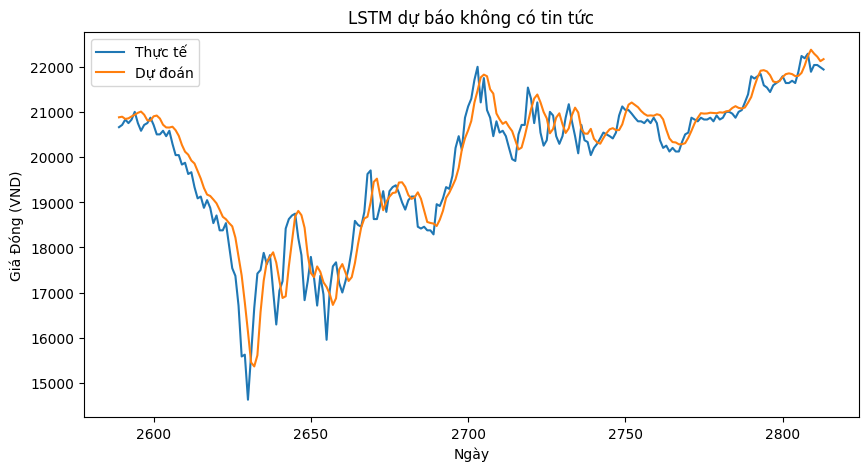

 R2 Score:  0.895834114144312
 MAE:  370.0116753472222


In [182]:
plt.figure(figsize=(10,5))
plt.title("LSTM dự báo không có tin tức")
plt.xlabel('Ngày')
plt.ylabel('Giá Đóng (VND)')
#plt.plot(df2['Close'])
plt.plot(test_df[['actual','yhat']])
#plt.legend(["Original", "Valid", 'Predicted'])
plt.legend([ "Thực tế", 'Dự đoán'])
plt.show()

# chỉ số scoring cho kết quả hồi quy
print(' R2 Score: ', r2_score(test_df['actual'],test_df['yhat']))
print(' MAE: ', mean_absolute_error(test_df['actual'],test_df['yhat']))

In [ ]:
#with news

In [183]:
%%time
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 

CPU times: total: 0 ns
Wall time: 0 ns


In [138]:
#withnews
dtt3.columns = ['TradingDate','acb_neg','macro_neg','acb_positive','macro_positive','acb_neutral','macro_neutral']


In [139]:
df['TradingDate'] = df.TradingDate.astype(str)
dtt3['TradingDate'] = dtt3.TradingDate.astype(str)
df_merge_col = pd.merge(df, dtt3, on='TradingDate', how='left').reset_index(drop=True)
df_merge_col=df_merge_col.fillna(0)
df_merge_col

,Open,High,Low,Close,Volume,TradingDate,acb_neg,macro_neg,acb_positive,macro_positive,acb_neutral,macro_neutral
0,4930.0,5030.0,4870.0,4970.0,862200,2012-03-20,0.000000,0.366307,0.000000,0.323059,0.000000,0.310634
1,4950.0,5050.0,4890.0,4990.0,1608000,2012-03-21,0.000000,0.409755,0.000000,0.204810,0.000000,0.385435
2,5030.0,5030.0,4910.0,4990.0,578600,2012-03-22,0.041670,0.241943,0.363875,0.260494,0.594455,0.497563
3,4950.0,5000.0,4910.0,4950.0,1402600,2012-03-23,0.008663,0.335815,0.898860,0.525550,0.092477,0.138635
4,5050.0,5060.0,4970.0,4990.0,1228700,2012-03-26,0.492117,0.396637,0.498434,0.349834,0.009448,0.253529
...,...,...,...,...,...,...,...,...,...,...,...,...
2812,22300.0,22400.0,21900.0,21900.0,8151200,2023-06-29,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2813,21900.0,22050.0,21800.0,22050.0,5117900,2023-06-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2814,22050.0,22100.0,21950.0,22050.0,4029900,2023-07-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2815,21950.0,22050.0,21900.0,22000.0,4346600,2023-07-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [140]:
df_merge_col.to_csv('datawithnewsscorev2.csv')

In [141]:
df_merge_col=pd.read_csv('datawithnewsscorev2.csv')


In [143]:
print(df_merge_col)

      Unnamed: 0     Open     High      Low    Close   Volume TradingDate  \
0              0   4930.0   5030.0   4870.0   4970.0   862200  2012-03-20   
1              1   4950.0   5050.0   4890.0   4990.0  1608000  2012-03-21   
2              2   5030.0   5030.0   4910.0   4990.0   578600  2012-03-22   
3              3   4950.0   5000.0   4910.0   4950.0  1402600  2012-03-23   
4              4   5050.0   5060.0   4970.0   4990.0  1228700  2012-03-26   
...          ...      ...      ...      ...      ...      ...         ...   
2812        2812  22300.0  22400.0  21900.0  21900.0  8151200  2023-06-29   
2813        2813  21900.0  22050.0  21800.0  22050.0  5117900  2023-06-30   
2814        2814  22050.0  22100.0  21950.0  22050.0  4029900  2023-07-03   
2815        2815  21950.0  22050.0  21900.0  22000.0  4346600  2023-07-04   
2816        2816  22000.0  22100.0  21950.0  21950.0  8124400  2023-07-05   

       acb_neg  macro_neg  acb_positive  macro_positive  acb_neutral  \
0  

In [144]:
# split a univariate sequence
def split_sequence(sequence, n_steps, day_range):
    X, y, z = list(), list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y, seq_z = sequence[i:end_ix], sequence[end_ix], day_range[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        z.append(seq_z)
    return X,y,z

In [145]:
# define input sequence
df_merge_col = df_merge_col.sort_values(by = 'TradingDate',ascending = [True])
raw_seq = df_merge_col.Close.to_list()
day_value = df_merge_col.TradingDate.to_list()


In [146]:
%%time
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
# split a univariate sequence
def split_sequence(sequence, n_steps, day_range):
    X, y, z = list(), list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y, seq_z = sequence[i:end_ix], sequence[end_ix], day_range[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        z.append(seq_z)
    return X,y,z

CPU times: total: 0 ns
Wall time: 0 ns


In [147]:

 
# define input sequence
df_merge_col = df_merge_col.sort_values(by = 'TradingDate',ascending = [True])
raw_seq = df_merge_col.Close.to_list()
day_value = df_merge_col.TradingDate.to_list()

# choose a number of time steps
n_steps = 3

# split into samples
## close price
X,y,day_value0 = split_sequence(raw_seq,n_steps,day_value)
df_training_and_testing0 = pd.DataFrame.from_dict({'TradingDate':day_value0,'X':X,'y':y})

## macro_neg
X1,news1,day_value1 = split_sequence(df_merge_col.macro_neg.to_list(),n_steps,day_value)
df_training_and_testing1 = pd.DataFrame.from_dict({'TradingDate':day_value1,'X1':X1})

## macro_positive
X2,news2,day_value2 = split_sequence(df_merge_col.macro_positive.to_list(),n_steps,day_value)
df_training_and_testing2 = pd.DataFrame.from_dict({'TradingDate':day_value2,'X2':X2})
## macro_neutral
X3,news3,day_value3 = split_sequence(df_merge_col.macro_neutral.to_list(),n_steps,day_value)
df_training_and_testing3 = pd.DataFrame.from_dict({'TradingDate':day_value3,'X3':X3})

## acb_neg
X4,news4,day_value4 = split_sequence(df_merge_col.acb_neg.to_list(),n_steps,day_value)
df_training_and_testing4 = pd.DataFrame.from_dict({'TradingDate':day_value4,'X4':X4})
## acb_positive
X5,news5,day_value5 = split_sequence(df_merge_col.acb_positive.to_list(),n_steps,day_value)
df_training_and_testing5 = pd.DataFrame.from_dict({'TradingDate':day_value5,'X5':X5})
## acb_neutral
X6,news6,day_value6 = split_sequence(df_merge_col.acb_neutral.to_list(),n_steps,day_value)
df_training_and_testing6 = pd.DataFrame.from_dict({'TradingDate':day_value6,'X6':X6})

df_training_and_testing = df_training_and_testing0.merge(df_training_and_testing1, how = 'left', on = 'TradingDate')\
.merge(df_training_and_testing2, how = 'left', on = 'TradingDate')\
.merge(df_training_and_testing3, how = 'left', on = 'TradingDate')\
.merge(df_training_and_testing4, how = 'left', on = 'TradingDate')\
.merge(df_training_and_testing5, how = 'left', on = 'TradingDate')\
.merge(df_training_and_testing6, how = 'left', on = 'TradingDate')


In [148]:


#split bằng lấy ngưỡng trong khoảng thời gian
total_length = df_training_and_testing.shape[0]
threshold1 = total_length * 0.7
# threshold2 = total_length * 0.8
threshold2 = total_length * 0.92
X_train, y_train = df_training_and_testing.loc[0:threshold1].drop(columns = 'y'), df_training_and_testing.loc[0:threshold1]['y']
X_validation, y_validation = df_training_and_testing.loc[threshold1:threshold2].drop(columns = 'y')\
, df_training_and_testing.loc[threshold1:threshold2]['y']
X_test, y_test = df_training_and_testing.loc[threshold2:total_length].drop(columns = 'y')\
, df_training_and_testing.loc[threshold2:total_length]['y']
# split bằng train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df_training_and_testing.drop(columns = ['y']), df_training_and_testing['y'], test_size=0.3, random_state=42)
# define model

In [149]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,mean_absolute_percentage_error
def get_x_train_all_features (df):
    col_list = df.columns.to_list()
    list_of_features = [reshape_function(df, col) for col in col_list]
    X_all_features = np.append(np.append(np.append(np.append(np.append(\
                           np.append(list_of_features[0],list_of_features[1],axis = 1),
                           list_of_features[2],axis=1),
                           list_of_features[3],axis=1),
                           list_of_features[4],axis=1),
                           list_of_features[5],axis=1),
                           list_of_features[6],axis=1)
#    return np.append(list_of_features, axis = 1)
    return X_all_features

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(\
get_x_train_all_features(X_train.drop(columns = ['TradingDate'])).shape[1],\
get_x_train_all_features(X_train.drop(columns = ['TradingDate'])).shape[2])))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(get_x_train_all_features(X_train.drop(columns = ['TradingDate'])),y_train,epochs=200, batch_size=25,\
                    validation_data=(get_x_train_all_features(X_validation.drop(columns = ['TradingDate'])), y_validation),\
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0, shuffle=False)
train_predict = model.predict(get_x_train_all_features(X_train.drop(columns = ['TradingDate'])))
train_predict = [i[0] for i in train_predict]

yhat  = model.predict(get_x_train_all_features(X_test.drop(columns = ['TradingDate'])))
yhat = [i[0] for i in yhat]

# chỉ số scoring cho kết quả hồi quy
print('Train R2 Score: ', r2_score(y_train, train_predict))
print('Train MAE: ', mean_absolute_error(y_train, train_predict))
print('Train RMSE: ', mean_squared_error(y_train, train_predict, squared=False))
print('Train MAPE: ',mean_absolute_percentage_error(y_train, train_predict))

print('Test R2 Score: ', r2_score(y_test, yhat))
print('Test MAE: ', mean_absolute_error(y_test, yhat))
print('Test RMSE: ', mean_squared_error(y_test, yhat, squared=False))
print('Test MAPE: ',mean_absolute_percentage_error(y_test, yhat))
# prediction df
train_df = pd.DataFrame({'TradingDate':X_train.TradingDate.to_list(),'actual':y_train})
test_df = pd.DataFrame({'TradingDate':X_test.TradingDate.to_list(),'actual':y_test,'yhat':yhat})

# biểu diễn yhat và yprediction
macro = [go.Scatter(x = test_df['TradingDate'],
                         y= test_df['actual'],
                         mode='lines',
                         name='thực tế',
                         line=dict(width=2)),
        go.Scatter(x = test_df['TradingDate'],
                         y=test_df['yhat'],
                         mode='lines',
                         name='dự đoán',
                         line=dict(width=2))]

macro_figure = go.Figure(data=macro)
macro_figure.show()

8/8 [==============================] - 0s 1ms/step
Train R2 Score:  0.9970852130272525
Train MAE:  85.90245176948002
Train RMSE:  153.4167262832155
Train MAPE:  0.01287431379062366
Test R2 Score:  0.949504907563328
Test MAE:  240.36124501329786
Test RMSE:  293.3122569925579
Test MAPE:  0.012260708079839103


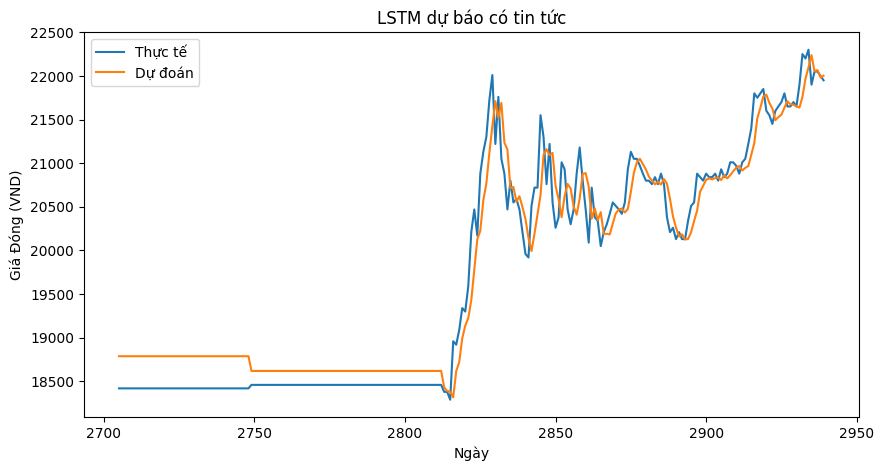

 R2 Score:  0.949504907563328
 MAE:  240.36124501329786


In [150]:
plt.figure(figsize=(10,5))
plt.title("LSTM dự báo có tin tức")
plt.xlabel('Ngày')
plt.ylabel('Giá Đóng (VND)')
#plt.plot(df2['Close'])
plt.plot(test_df[['actual','yhat']])
#plt.legend(["Original", "Valid", 'Predicted'])
plt.legend([ "Thực tế", 'Dự đoán'])
plt.show()

# chỉ số scoring cho kết quả hồi quy
print(' R2 Score: ', r2_score(test_df['actual'],test_df['yhat']))
print(' MAE: ', mean_absolute_error(test_df['actual'],test_df['yhat']))

In [ ]:
test_df = []